In [41]:
import numpy 
import pandas

import matplotlib.pyplot as plt
import seaborn as sns

from datasets import load_dataset
from transformers import AutoTokenizer


In [20]:
df = load_dataset("cnn_dailymail", "3.0.0")

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

In [29]:
df

DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})

In [30]:
def show_samples(dataset, num_samples=3, seed=42):
    sample = dataset["train"].shuffle(seed=seed).select(range(num_samples))
    for example in sample:
        print(f"{'>>' * 20} DOCUMENT {'<<' * 20}")
        print(f"'{example['article']}'")
        print()
        print(f"{'>>' * 20} SUMMARY {'<<' * 20}")
        print(f"'{example['highlights']}'")
        print()
        print()
        print('=' * 90)
        print()


show_samples(df)

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> DOCUMENT <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
'By . Anthony Bond . PUBLISHED: . 07:03 EST, 2 March 2013 . | . UPDATED: . 08:07 EST, 2 March 2013 . Three members of the same family who died in a static caravan from carbon monoxide poisoning would have been unconscious 'within minutes', investigators said today. The bodies of married couple John and Audrey Cook were discovered alongside their daughter, Maureen, at the mobile home they shared on Tremarle Home Park in Camborne, west Cornwall. The inquests have now opened into the deaths last Saturday, with investigators saying the three died along with the family's pet dog, of carbon monoxide poisoning from a cooker. Tragic: The inquests have opened into the deaths of three members of the same family who were found in their static caravan last weekend. John and Audrey Cook are pictured . Awful: The family died following carbon monoxide poisoning at this caravan at the Tremarle Home Park in Cambo

In [31]:
df.set_format("pandas")

In [35]:
df_train = df['train'][:]
df_val = df['validation'][:]
df_test = df['test'][:]

In [36]:
df_train.head()

,article,highlights,id
0,"LONDON, England (Reuters) -- Harry Potter star...",Harry Potter star Daniel Radcliffe gets £20M f...,42c027e4ff9730fbb3de84c1af0d2c506e41c3e4
1,Editor's note: In our Behind the Scenes series...,Mentally ill inmates in Miami are housed on th...,ee8871b15c50d0db17b0179a6d2beab35065f1e9
2,"MINNEAPOLIS, Minnesota (CNN) -- Drivers who we...","NEW: ""I thought I was going to die,"" driver sa...",06352019a19ae31e527f37f7571c6dd7f0c5da37
3,WASHINGTON (CNN) -- Doctors removed five small...,"Five small polyps found during procedure; ""non...",24521a2abb2e1f5e34e6824e0f9e56904a2b0e88
4,(CNN) -- The National Football League has ind...,"NEW: NFL chief, Atlanta Falcons owner critical...",7fe70cc8b12fab2d0a258fababf7d9c6b5e1262a


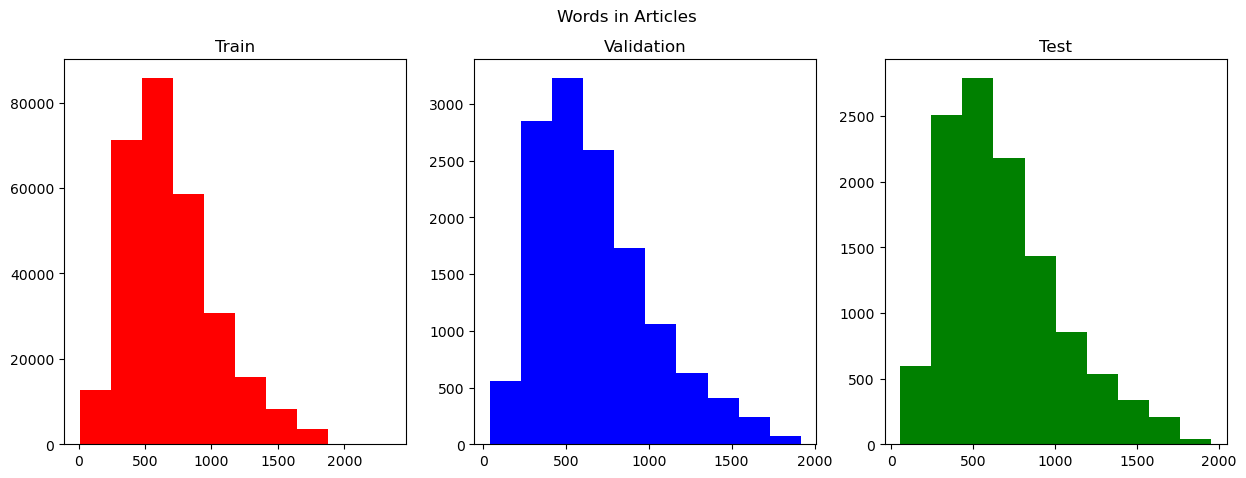

In [39]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

train_title_len=df_train['article'].str.split().map(len)
ax1.hist(train_title_len, color='red')
ax1.set_title('Train')

val_title_len=df_val['article'].str.split().map(len)
ax2.hist(val_title_len, color='blue')
ax2.set_title('Validation')

test_title_len=df_test['article'].str.split().map(len)
ax3.hist(test_title_len, color='green')
ax3.set_title('Test')

fig.suptitle('Words in Articles')
plt.show()

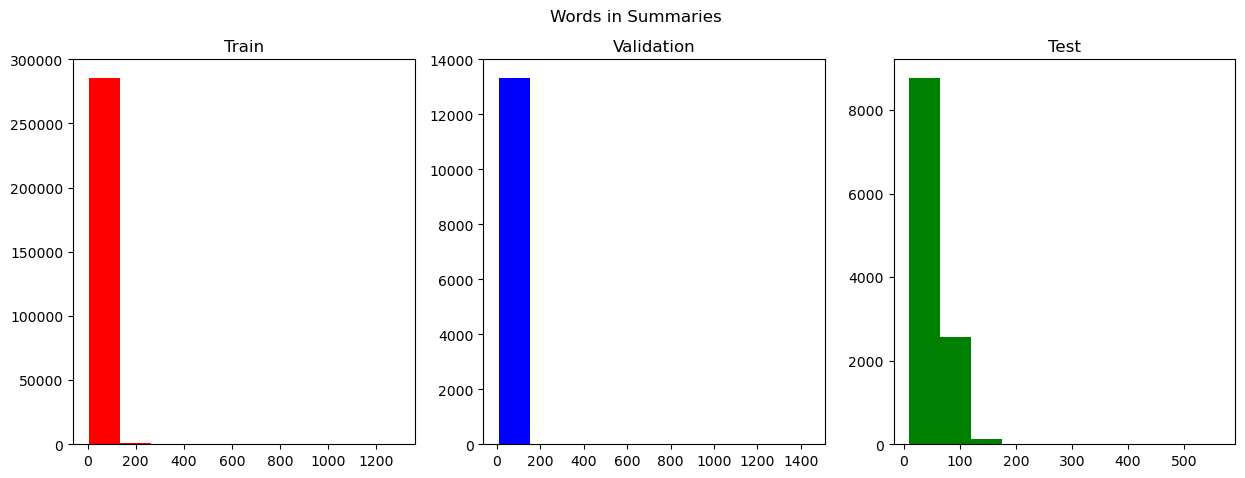

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

train_title_len=df_train['highlights'].str.split().map(len)
ax1.hist(train_title_len, color='red')
ax1.set_title('Train')

val_title_len=df_val['highlights'].str.split().map(len)
ax2.hist(val_title_len, color='blue')
ax2.set_title('Validation')

test_title_len=df_test['highlights'].str.split().map(len)
ax3.hist(test_title_len, color='green')
ax3.set_title('Test')

fig.suptitle('Words in Summaries')
plt.show()

In [42]:
model_checkpoint = "google/mt5-small"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

tokenizer_config.json:   0%|          | 0.00/82.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/opt/conda/lib/python3.11/site-packages/transformers/convert_slow_tokenizer.py:550: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [53]:
inputs = tokenizer(
    [
        "I loved reading the Hunger Games!", 
        "In practice this means that the fast version of the tokenizer can produce unknown"
    ], 
    padding="longest")
inputs

{'input_ids': [[336, 259, 28387, 11807, 287, 62893, 295, 12507, 309, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [563, 16279, 714, 259, 12909, 533, 287, 4756, 7060, 304, 287, 259, 67185, 20409, 738, 14804, 259, 78784, 1]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}